Coefficients: 
 [0.38834364]
Mean squared error: 0.23
Coefficient of determination: 0.53
intercept_: 0.630190695014837
feature: <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


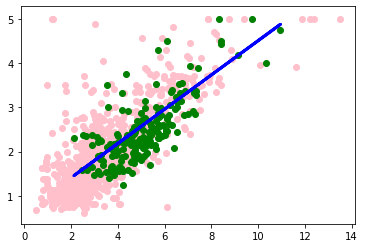

In [72]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
X, y = datasets.fetch_california_housing(return_X_y=True)

# from sklearn.datasets import load_boston
# boston = load_boston()
# boston.keys()
# X, y = boston.data, boston.target

# Use only one feature
X = X[:,0:1]

X = X[:1000] #defini um escopo pq é muito
y = y[:1000]

# plt.scatter(X,y)
# plt.show()

# Split the data into training/testing sets
X_train = X[:800]
X_test = X[800:]

# X_train = X_test = X

# Split the targets into training/testing sets
y_train = y[:800]
y_test = y[800:]

# y_train = y_test = y

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("intercept_:",regr.intercept_)

# Plot outputs
plt.scatter(X_train, y_train, color="pink") #train
plt.scatter(X_test, y_test, color="g") #test

plt.plot(X_test, y_pred, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

In [ ]:
#WIP
delta = 8

w = np.linspace(modelo.w[1]-delta, modelo.w[1]-delta, 30)

#percorrer depois de X-8>x>X+8 (= intercept)
# substituindo o intercept pelo novo e calcular o RMSE apos o predict
# acumulando os rmse num array e depois plota eles

Erro = np.empty(W0.shape)
for j in range(Erro.shape[0]):
	for k in range(Erro.shape[1]):
		modelo.w[0] = W0[j][k]
		modelo.w[1] = W1[j][k]
		ypred = modelo.predict(X)
		mse = mean_squared_error(y, ypred)
		Erro[j][k] = mse



rmse: 5.181785862001199
fitado rmse: 0.3265605536759431


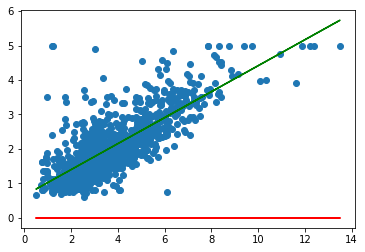

array([[0.64693771],
       [0.37684951]])

In [76]:

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y


plt.scatter(X, y)
modelo = regressao_linear()
ypred = modelo.predict(X)
print('rmse:',mean_squared_error(y,ypred))
plt.plot(X, ypred, 'r')

modelo.fit(X, y)

ypred = modelo.predict(X)
print('fitado rmse:',mean_squared_error(y,ypred))
plt.plot(X, ypred, 'g')
plt.show()
modelo.w

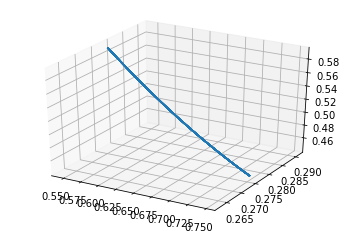

In [79]:
from sklearn.metrics import mean_squared_error
import numpy as np

delta = 8

w0 = np.linspace(modelo.w[0]-delta, modelo.w[0]+delta, 30)
w1 = np.linspace(modelo.w[1]-delta, modelo.w[1]-delta, 30)


def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75,
                cmap='coolwarm', edgecolor='none')

plt.show()